In [ ]:
from collections import defaultdict
import numpy as np
import math
from functools import cmp_to_key

In [ ]:
from torch._C import NoneType
from ast import dump

!git clone https://github.com/PaddlePaddle/PaddleOCR.git
!pip install paddlepaddle-gpu
!pip install paddleocr
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
!sudo dpkg -i libssl1.1_1.1.0g-2ubuntu4_amd64.deb
!pip install paddlepaddle
!pip install "paddleocr>=2.0.1"
!pip install paddlepaddle paddleocr
from paddleocr import PaddleOCR




import os
from glob import glob
from tqdm import tqdm
import json
import cv2
from matplotlib import pyplot as plt
import numpy as np

ocr = PaddleOCR(use_angle_cls=True, lang='en')

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 47576, done.
remote: Counting objects: 100% (817/817), done.
remote: Compressing objects: 100% (373/373), done.
remote: Total 47576 (delta 526), reused 657 (delta 439), pack-reused 46759
Receiving objects: 100% (47576/47576), 345.06 MiB | 18.71 MiB/s, done.
Resolving deltas: 100% (33539/33539), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.5/542.5 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 109.0 MB/s e

--2023-11-14 13:20:37--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 185.125.190.36, 91.189.91.81, 185.125.190.39, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|185.125.190.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1128092 (1.1M) [application/x-debian-package]
Saving to: ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb’

libssl1.1_1.1.0g-2u 100%[===================>]   1.08M  1.40MB/s    in 0.8s    

2023-11-14 13:20:38 (1.40 MB/s) - ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb’ saved [1128092/1128092]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 120872 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.0g-2ubuntu4_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.0g-2ubuntu4) ...
Setting up libssl1.1:amd64 (1.1.0g-2ubuntu4) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like p

100%|██████████| 4.00M/4.00M [00:03<00:00, 1.17MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:16<00:00, 605kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:13<00:00, 164kiB/s]

[2023/11/14 13:21:49] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [ ]:
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import torch
from collections import Counter
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from google.colab import drive
import os
from os import listdir
from os.path import isfile, join
drive.mount("/content/gdrive")

os.chdir("/content/gdrive/MyDrive/vizwiz/")


img_path = "/content/gdrive/MyDrive/vizwiz/VizWiz_train_00000004.jpg"


Mounted at /content/gdrive


FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
qa

[2023/11/03 18:49:34] ppocr DEBUG: dt_boxes num : 13, elapsed : 1.0963921546936035
[2023/11/03 18:49:35] ppocr DEBUG: cls num  : 13, elapsed : 0.2523050308227539
[2023/11/03 18:49:38] ppocr DEBUG: rec_res num  : 13, elapsed : 3.1283202171325684


In [ ]:
concat_output = ". ".join(row[1][0] for row in result[0])
print(concat_output)

OLARGARDENLIGHT. By Oivine power Lighting. OLAR GARDEN LIGHT. Brighten up your patios,. decking,driveways. &flowerbeds. Stainless Steel Construction. Rechargeable 1xAA 600mAH. 600mAH Battery Included. White LED Light for Brighter Output. Auto Sensor Turns On When Dark. Easy Assembly and Installation. No Wiring, Install Anywhere


In [ ]:
!pip install -U transformers[sentencepiece]
!python -m nltk.downloader punkt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.6 MB/s eta 0:00:00
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer
from torch import tensor,argmax
from transformers import BertTokenizer
from transformers import BertForQuestionAnswering

In [ ]:
tokenizer_q = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")
model_q = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")
model_a = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
tokenizer_a = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def get_questions(context, max_length=64):
    qns=[]
    sentences=context.split('.')
    for sentence in sentences[:-1]:
        input_text = "answer: %s  context: %s </s>" % ('', sentence)
        features = tokenizer_q([input_text], return_tensors='pt')

        output = model_q.generate(input_ids=features['input_ids'],
                   attention_mask=features['attention_mask'],
                   max_length=max_length)
        qns.append(tokenizer_q.decode(output[0]).replace('<pad> question: ','').replace('</s>',''))
    return qns

In [ ]:
def answer_question(question, context):
    input_ids = tokenizer_a.encode(question, context)
    sep_index = input_ids.index(tokenizer_a.sep_token_id)
    num_seg_a = sep_index + 1
    num_seg_b = len(input_ids) - num_seg_a
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    assert len(segment_ids) == len(input_ids)
    outputs = model_a(tensor([input_ids]),
                    token_type_ids=tensor([segment_ids]),
                    return_dict=True)
    start_scores = outputs.start_logits
    end_scores = outputs.end_logits
    answer_start = argmax(start_scores)
    answer_end = argmax(end_scores)
    tokens = tokenizer_a.convert_ids_to_tokens(input_ids)
    answer = tokens[answer_start]
    for i in range(answer_start + 1, answer_end + 1):
        if tokens[i][0:2] == '##':
            answer += tokens[i][2:]
        else:
            answer += ' ' + tokens[i]
    return answer

Text:

OLARGARDENLIGHT. By Oivine power Lighting. OLAR GARDEN LIGHT. Brighten up your patios,. decking,driveways. &flowerbeds. Stainless Steel Construction. Rechargeable 1xAA 600mAH. 600mAH Battery Included. White LED Light for Brighter Output. Auto Sensor Turns On When Dark. Easy Assembly and Installation. No Wiring, Install Anywhere

Generated Question and Answers

Qn.1  What is the purpose of a white LED light?
Ans : for brighter output

Qn.2  What is one way to brighten up your patios?
Ans : olar garden light

Qn.3  How much power does the battery last?
Ans : 1xaa 600mah . 600mah

Qn.4  What is the name of the OLAR GARDEN LIGHT?
Ans : olargardenlight

Qn.5  What type of decking is used?
Ans : stainless steel

Qn.6  What happens when the Auto Sensor is turned on?
Ans : when dark . easy assembly and installation

Qn.7  What is the name of the company that produces the lighting?
Ans : oivine power lighting

Qn.8  What is the name of the construction material used in the Stainless Stee

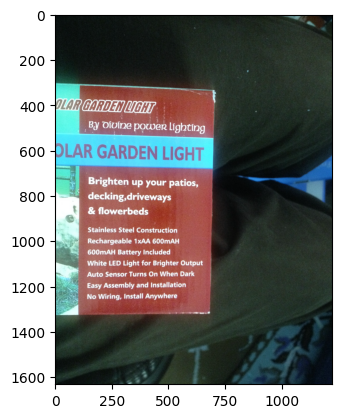

In [ ]:
plt.imshow(cv2.imread(img_path))

context_q_a = concat_output
print("Text:\n")
print(concat_output)
print("\nGenerated Question and Answers",end='\n\n')
question_q_a=list(set(get_questions(context_q_a)))
answer_q_a=[]
for qn in question_q_a:
    answer_q_a.append(answer_question(qn,context_q_a))
for i in range(len(question_q_a)):
    print('Qn.'+str(i+1)+'  '+question_q_a[i],sep='\n')
    print('Ans : '+answer_q_a[i],sep='\n',end='\n\n')